Legal documents can be complex. They are extremely verbose and tedious enough to read through. Since in our context our focus lies on evaluating AI generated documents, we must make sure to ensure the following criteria are met:

1.	Clarity
2.	Compliance
3.	Consistency
4.	Usability

The above are the main categories that ensure a legal document is credible to be used in the court of law. Just as numerical data has descriptive statistics to define its quality, text data also has the following textual statistics that are necessary to get better insights into the data we have


**Readability Index:**
It is a way to measure how a person can percieve, understand, comprehend the given data. It is a way to ensure the legibility of a document. The readability index in human-generated data, especially in legal documents, is a vital tool for clarity, compliance, accessibility, and global communication

In [ ]:
import pandas as pd
import json
with open('label_0_human_new.json') as f:
    data = json.load(f)

In [ ]:
df1 = pd.DataFrame(data)
df1 = df1.rename(columns={0: "file"})


In [ ]:
df1

,file,label
0,DLD-054 ...,0
1,,0
2,,0
3,2024 IL App (3d) 2...,0
4,FIRST DISTRICT COURT OF APPEAL\n ...,0
...,...,...
395,EN EL TRIBUNAL SUPREMO DE P...,0
396,EN EL TRIBUNAL SUPREMO D...,0
397,EN EL TRIBUNAL SUPREMO DE PUE...,0
398,"THE SUPREME COURT, STATE OF ...",0


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import gensim

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Set up stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define a function to clean the text
def clean_text(text):
    # Remove the word 'Citation' and any other unwanted patterns
    text = re.sub(r'citation', '', text, flags=re.I)
    # Remove punctuation and numbers
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Remove additional whitespaces
    text = re.sub(r'\s+', ' ', text)
    return text.strip().lower()

# Define a function to preprocess text
def preprocess_text(text):
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 1]
    return tokens

# Clean the text
df1['cleaned_text'] = df1['file'].apply(clean_text)

# Preprocess the text
df1['processed_text'] = df1['cleaned_text'].apply(preprocess_text)

# Create Dictionary and Corpus
dictionary = gensim.corpora.Dictionary(df1['processed_text'])
corpus = [dictionary.doc2bow(text) for text in df1['processed_text']]

# You can now run the LDA model using the corpus and dictionary
# The plotting part should be done in a cell in Google Colab for visualization


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df1['processed_text']

0      [dld, precedential, united, state, court, appe...
1                                                     []
2                                                     []
3      [il, app, opinion, filed, january, appellate, ...
4      [first, district, court, appeal, state, florid...
                             ...                        
395    [en, el, tribunal, supremo, de, puerto, rico, ...
396    [en, el, tribunal, supremo, de, puerto, rico, ...
397    [en, el, tribunal, supremo, de, puerto, rico, ...
398    [supreme, court, state, wyoming, wy, october, ...
399    [supreme, court, state, wyoming, wy, october, ...
Name: processed_text, Length: 400, dtype: object

In [ ]:
df1.to_csv('data.txt', sep='\t', index=False)

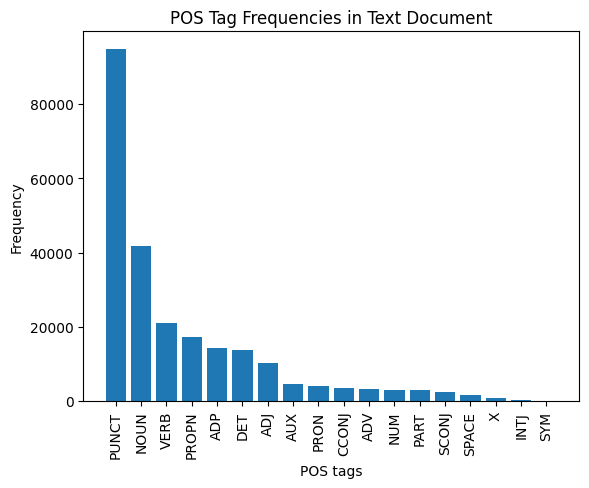

In [ ]:
import spacy
import matplotlib.pyplot as plt
from collections import Counter

# Load spaCy's English model
nlp = spacy.load('en_core_web_sm')

# Process the document
with open('data_chunk_3.txt', 'r') as file:
    text = file.read()

doc = nlp(text)

# Count the POS tags
pos_counts = Counter([token.pos_ for token in doc])

# Sort the POS tags by count for plotting
sorted_pos_counts = dict(sorted(pos_counts.items(), key=lambda item: item[1], reverse=True))

# Plot
plt.bar(sorted_pos_counts.keys(), sorted_pos_counts.values())
plt.xlabel('POS tags')
plt.ylabel('Frequency')
plt.title('POS Tag Frequencies in Text Document')
plt.xticks(rotation=90)  # Rotate the x labels so they don't overlap
plt.show()


In [ ]:
!pip install textstat


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 14.4 MB/s eta 0:00:00


In [ ]:
import textstat


In [ ]:
with open('data_human.txt', 'r') as file:
    text = file.read()


In [ ]:
flesch_reading_ease = textstat.flesch_reading_ease(text)
smog_index = textstat.smog_index(text)
flesch_kincaid_grade = textstat.flesch_kincaid_grade(text)
coleman_liau_index = textstat.coleman_liau_index(text)
automated_readability_index = textstat.automated_readability_index(text)
dale_chall_readability_score = textstat.dale_chall_readability_score(text)
difficult_words = textstat.difficult_words(text)
linsear_write_formula = textstat.linsear_write_formula(text)
gunning_fog = textstat.gunning_fog(text)
text_standard = textstat.text_standard(text)

# Print the results
print(f"Flesch Reading Ease: {flesch_reading_ease}")
print(f"SMOG Index: {smog_index}")
print(f"Flesch-Kincaid Grade: {flesch_kincaid_grade}")
print(f"Coleman-Liau Index: {coleman_liau_index}")
print(f"Automated Readability Index: {automated_readability_index}")
print(f"Dale-Chall Readability Score: {dale_chall_readability_score}")
print(f"Difficult Words: {difficult_words}")
print(f"Linsear Write Formula: {linsear_write_formula}")
print(f"Gunning Fog: {gunning_fog}")
print(f"Text Standard: {text_standard}")


Flesch Reading Ease: 20.08
SMOG Index: 19.2
Flesch-Kincaid Grade: 21.0
Coleman-Liau Index: 14.64
Automated Readability Index: 28.5
Dale-Chall Readability Score: 2.44
Difficult Words: 35814
Linsear Write Formula: 7.125
Gunning Fog: 17.2
Text Standard: 20th and 21st grade


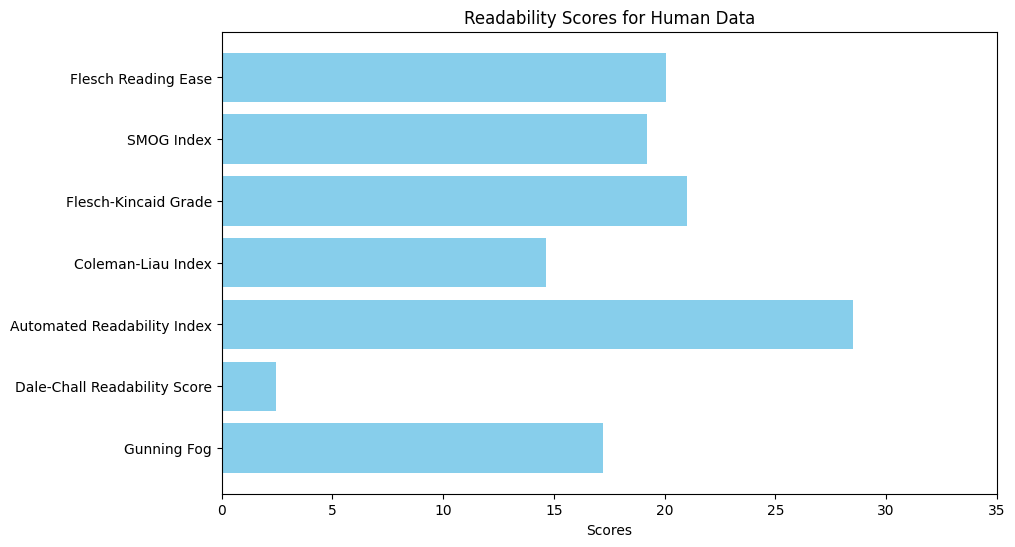

In [ ]:
import matplotlib.pyplot as plt
import textstat

# Let's assume 'text' contains your document text
with open('data_human.txt', 'r') as file:
    text = file.read()

# Calculate various readability scores
scores = {
    'Flesch Reading Ease': textstat.flesch_reading_ease(text),
    'SMOG Index': textstat.smog_index(text),
    'Flesch-Kincaid Grade': textstat.flesch_kincaid_grade(text),
    'Coleman-Liau Index': textstat.coleman_liau_index(text),
    'Automated Readability Index': textstat.automated_readability_index(text),
    'Dale-Chall Readability Score': textstat.dale_chall_readability_score(text),
    'Gunning Fog': textstat.gunning_fog(text)
}

# Create bar plot
plt.figure(figsize=(10, 6))
plt.barh(list(scores.keys()), list(scores.values()), color='skyblue')
plt.xlabel('Scores')
plt.title('Readability Scores for Human Data')
plt.xlim(0, 35)
plt.gca().invert_yaxis()  # To display the highest score at the top
plt.show()
